In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [2]:
news_stories_df = pd.read_csv('NewsAggregatorDataset/newsCorpora.csv', delimiter='\t')


In [3]:
news_stories_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [3]:
len(news_stories_df)

422419

In [4]:
len(set(news_stories_df['PUBLISHER']))

10986

In [5]:

news_stories_df[news_stories_df.CATEGORY == 'e'].sample(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
380562,381022,Tupac Musical Proves To Be A Broadway Flop,http://web.orange.co.uk/article/news/tupac_mus...,Orange UK News,e,dlB_mL2Vk4B_3yMpnHJk5detRhNJM,web.orange.co.uk,1405495511819
232676,233122,First Look at 'Star Wars Episode VII' Abu Dhab...,http://www.slashfilm.com/star-wars-episode-vii...,\/FILM,e,dSY4Ahs2UF6WTuM81IETcs7oDycmM,www.slashfilm.com,1400702369082
202802,203238,Sherri Shepherd's Husband Serves Her With Divo...,http://rumorfix.com/2014/05/sherri-shepherds-h...,RumorFix,e,dH1JQUEx2uzq4zM7hGLRK41d_K8EM,rumorfix.com,1399704926601
389717,390177,"'Wish I Was Here': Zach Braff on love, his new...",http://www.jewishjournal.com/the_ticket/item/w...,The Jewish Journal of Greater L.A.,e,dWc6PsgbZF3jHXMbPiEGYOS0t-5LM,www.jewishjournal.com,1405654227891
98457,98651,"Mad Men: Don Grew Up in a Whorehouse, What Can...",http://wallstcheatsheet.com/entertainment/mad-...,Wall St. Cheat Sheet,e,dQp_0Hv3qTdoGMMXikOnSJKtYXH-M,wallstcheatsheet.com,1397237947634


In [7]:
l = [1,1,3,4,6,8,8,10]

set(l)

{1, 3, 4, 6, 8, 10}

In [8]:
news_stories_df['CATEGORY']

0         b
1         b
2         b
3         b
4         b
5         b
6         b
7         b
8         b
9         b
10        b
11        b
12        b
13        b
14        b
15        b
16        b
17        b
18        b
19        b
20        b
21        b
22        b
23        b
24        b
25        b
26        b
27        b
28        b
29        b
         ..
422389    m
422390    m
422391    m
422392    m
422393    m
422394    m
422395    m
422396    m
422397    m
422398    m
422399    m
422400    m
422401    m
422402    m
422403    m
422404    m
422405    m
422406    m
422407    m
422408    m
422409    m
422410    m
422411    m
422412    m
422413    m
422414    m
422415    m
422416    m
422417    m
422418    m
Name: CATEGORY, Length: 422419, dtype: object

In [6]:
news_stories_df['CATEGORY'].value_counts()


e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [7]:
publisher_counts = news_stories_df['PUBLISHER'].value_counts()
top_publisher_counts = publisher_counts[:5]
len(publisher_counts)

10985

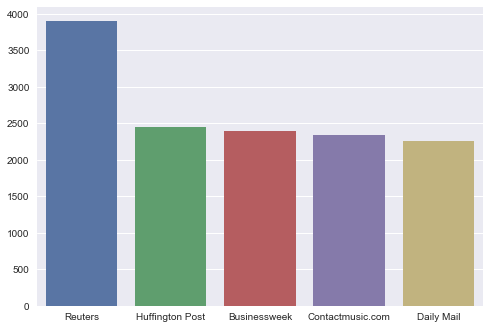

In [8]:
sns.barplot(x=top_publisher_counts.index, y=top_publisher_counts.values)
sns.plt.show()

In [9]:
category_counts = news_stories_df['CATEGORY'].value_counts()
popular_category_counts = category_counts[:5]


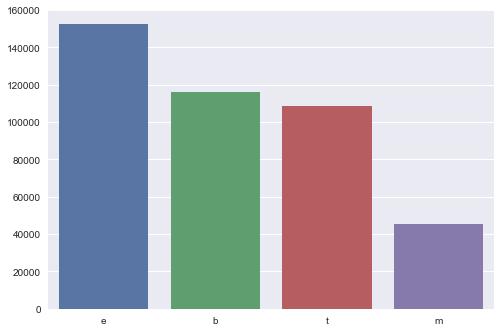

In [10]:
sns.barplot(x=popular_category_counts.index, y=popular_category_counts.values)
sns.plt.show()

In [16]:
entertainment_words = news_stories_df.CATEGORY

In [17]:
entertainment_words = news_stories_df[news_stories_df.CATEGORY == 'e']

In [23]:
entertainment_words.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
2169,2170,George Zimmerman Has an Armed Life on the Move,http://www.wltx.com/story/news/nation/2014/03/...,WLTX.com,e,d7RBEwyH92gFSrMjpl764nNfewB0M,www.wltx.com,1394517154092
2170,2171,George Zimmerman Signs Autographs At Florida G...,http://www.huffingtonpost.co.uk/2014/03/10/geo...,Huffington Post UK,e,d7RBEwyH92gFSrMjpl764nNfewB0M,www.huffingtonpost.co.uk,1394517154269
2171,2172,George Zimmerman Signed Autographs at an Orlan...,http://www.blacknews.com/news/george-zimmerman...,BlackNews.com \(press release\),e,d7RBEwyH92gFSrMjpl764nNfewB0M,www.blacknews.com,1394517154479


In [20]:
entertainment_titles = entertainment_words['TITLE']

entertainment_word = ' '.join(entertainment_titles)
entertainment_word[:500]

'George Zimmerman Has an Armed Life on the Move George Zimmerman Signs Autographs At Florida Gun Show George Zimmerman Signed Autographs at an Orlando Gun Show — But Only 20  ... George Zimmerman back in controversy George Zimmerman signs autographs at a Florida gun show George Zimmerman Signs Autographs At Gun Show George Zimmerman Fails To Cash In On Murder as Few Show Up To Meet Him  ... Homeless Zimmerman Signs Autographs at Gun Show George Zimmerman Fails to Kill at Gun Show George Zimmerman'

In [21]:
wordcloud = WordCloud(collocations=False).generate(entertainment_word)

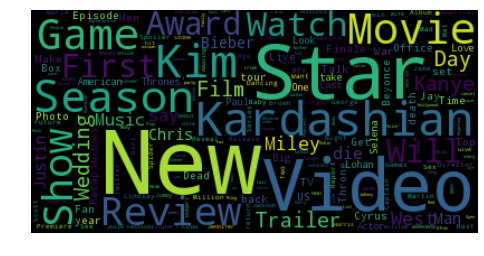

In [25]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
business_words = news_stories_df.CATEGORY

In [27]:
business_words = news_stories_df[news_stories_df.CATEGORY == 'b']

In [28]:
business_titles = business_words['TITLE']

business_word = ' '.join(business_titles)
entertainment_word[:500]

'George Zimmerman Has an Armed Life on the Move George Zimmerman Signs Autographs At Florida Gun Show George Zimmerman Signed Autographs at an Orlando Gun Show — But Only 20  ... George Zimmerman back in controversy George Zimmerman signs autographs at a Florida gun show George Zimmerman Signs Autographs At Gun Show George Zimmerman Fails To Cash In On Murder as Few Show Up To Meet Him  ... Homeless Zimmerman Signs Autographs at Gun Show George Zimmerman Fails to Kill at Gun Show George Zimmerman'

In [29]:
wordcloud = WordCloud(collocations=False).generate(business_word)

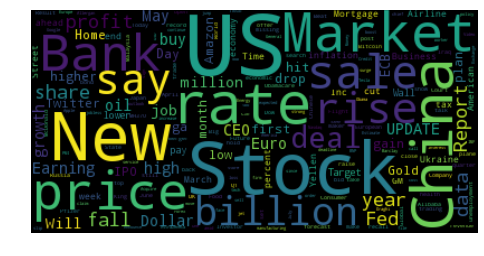

In [30]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
technology_words = news_stories_df.CATEGORY

In [32]:
technology_words = news_stories_df[news_stories_df.CATEGORY == 't']

In [33]:
technology_titles = technology_words['TITLE']

technology_word = ' '.join(technology_titles)
technology_word[:500]

'Titanfall Review Roundup Titanfall review: my buddy Respawn: Titanfall\'s server stability is in Microsoft\'s azure hands Titanfall\'s Resolution \'Likely\' to be Increased With Patch Xbox One Titanfall Bundle Release Date Tomorrow: Pre-Order Price at  ... Titanfall\'s Xbox One Resolution "Likely to Increase" After Launch \'Titanfall\' Live-Action Adaptation in Development; Trailer Release Date Revealed Titanfall Fans In South Africa Ask EA To Let Them Play Titanfall on Xbox One \'likely\' to get resoluti'

In [34]:
wordcloud = WordCloud(collocations=False).generate(technology_word)

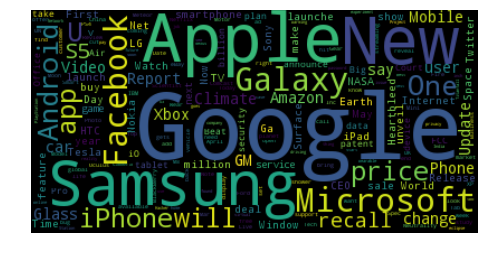

In [35]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
medical_words = news_stories_df.CATEGORY

In [37]:
medical_words = news_stories_df[news_stories_df.CATEGORY == 'm']

In [38]:
medical_titles = medical_words['TITLE']

medical_word = ' '.join(medical_titles)
medical_word[:500]

"Grown-ups: Put down the smartphones at mealtime Cellphone addiction may damage parent-child bond: Study Parents won't stop using smartphones even while eating with kids Smartphones making parents ignore their kids Smartphones can loosen emotional bonding with your children: Study Parents Distracted By Smartphones Ignore Their Kids Smartphones may threaten parent-child emotional bond Cell phone addiction may kill parent-child bond Parents often glued to cellphone while kids eat, study shows Mobil"

In [39]:
wordcloud = WordCloud(collocations=False).generate(medical_word)

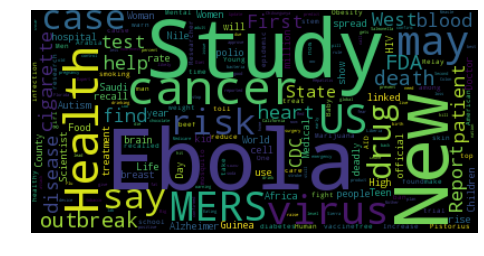

In [40]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

In [41]:
news_stories_df.head(3)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [42]:
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(news_stories_df.TITLE)
print(X.shape)
print(type(X))

(422419, 54637)
<class 'scipy.sparse.csr.csr_matrix'>


In [43]:
y = news_stories_df['CATEGORY']
y = np.array(y)


In [46]:
y


array(['b', 'b', 'b', ..., 'm', 'm', 'm'], dtype=object)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_actual = y_test

In [70]:
for a, b in zip(X_train[:5], y_train[:5]):
    print(a, b)

  (0, 5147)	1
  (0, 19060)	1
  (0, 28328)	1
  (0, 32247)	1
  (0, 36875)	1
  (0, 37952)	1
  (0, 53282)	1
  (0, 54200)	1 m
  (0, 4797)	1
  (0, 8668)	1
  (0, 19045)	1
  (0, 22409)	1
  (0, 24380)	1
  (0, 27971)	1
  (0, 28250)	1
  (0, 28344)	1
  (0, 33078)	1
  (0, 35097)	1
  (0, 44006)	1
  (0, 48305)	1 e
  (0, 1663)	1
  (0, 7133)	1
  (0, 12313)	1
  (0, 17050)	1
  (0, 20990)	1
  (0, 23918)	1
  (0, 26230)	1
  (0, 27669)	1
  (0, 36893)	1 b
  (0, 6156)	1
  (0, 7915)	1
  (0, 10323)	1
  (0, 45067)	1
  (0, 46138)	1
  (0, 49264)	1
  (0, 54140)	1 b
  (0, 21177)	1
  (0, 22416)	1
  (0, 23252)	1
  (0, 25909)	1
  (0, 25999)	1
  (0, 28814)	1
  (0, 47232)	1
  (0, 48429)	1
  (0, 51705)	1 m


In [71]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
y_pred = model.predict(X_test)

In [73]:
for predicted, actual in zip(y_pred[:5], y_actual[:5]):
    print("Predicted = {0}, Actual = {1}".format(predicted, actual))

Predicted = t, Actual = t
Predicted = t, Actual = t
Predicted = e, Actual = e
Predicted = m, Actual = m
Predicted = t, Actual = t


In [74]:
print(np.mean(y_pred == y_test))


0.925658507331


In [75]:
print(confusion_matrix(y_pred,y_test))

[[31544   616   523  2026]
 [  636 43917   446   573]
 [  553   268 12546   312]
 [ 2329   867   272 29298]]


In [76]:
print(classification_report(y_test,
                            y_pred))

             precision    recall  f1-score   support

          b       0.91      0.90      0.90     35062
          e       0.96      0.96      0.96     45668
          m       0.92      0.91      0.91     13787
          t       0.89      0.91      0.90     32209

avg / total       0.93      0.93      0.93    126726



In [77]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [78]:
y_pred = model.predict(X_test)

In [79]:
print(np.mean(y_pred == y_test))

0.947650837239


In [80]:
print(confusion_matrix(y_pred,y_test))

[[32527   503   446  1609]
 [  467 44571   227   382]
 [  304   190 12919   143]
 [ 1764   404   195 30075]]


In [81]:
print(classification_report(y_test,
                            y_pred))

             precision    recall  f1-score   support

          b       0.93      0.93      0.93     35062
          e       0.98      0.98      0.98     45668
          m       0.95      0.94      0.94     13787
          t       0.93      0.93      0.93     32209

avg / total       0.95      0.95      0.95    126726



In [82]:
model = LogisticRegression().fit(X_train, y_train)

In [83]:
y_pred = model.predict(X_test)

In [84]:
print(np.mean(y_pred == y_test))

0.94780865805


In [85]:
print(confusion_matrix(y_actual, y_pred))

[[32542   504   268  1748]
 [  500 44707   111   350]
 [  515   287 12788   197]
 [ 1573   456   105 30075]]


In [86]:
print(classification_report(y_test,
                            y_pred))

             precision    recall  f1-score   support

          b       0.93      0.93      0.93     35062
          e       0.97      0.98      0.98     45668
          m       0.96      0.93      0.95     13787
          t       0.93      0.93      0.93     32209

avg / total       0.95      0.95      0.95    126726



In [87]:
model.predict_proba(X_test)

array([[  2.62761533e-03,   1.32170167e-02,   2.42476156e-03,
          9.81730606e-01],
       [  5.99330719e-05,   1.54182489e-02,   1.36844421e-05,
          9.84508134e-01],
       [  2.54464409e-01,   7.39553258e-01,   3.03137449e-03,
          2.95095801e-03],
       ..., 
       [  1.51767869e-03,   9.83452007e-01,   3.44362135e-03,
          1.15866929e-02],
       [  2.05375127e-01,   4.17971163e-03,   8.80578862e-03,
          7.81639373e-01],
       [  9.54567235e-01,   2.12789846e-02,   8.06596333e-03,
          1.60878174e-02]])

In [68]:
news_stories_df.PUBLISHER

0                    Los Angeles Times
1                             Livemint
2                         IFA Magazine
3                         IFA Magazine
4                            Moneynews
5                               NASDAQ
6                          MarketWatch
7                         FXstreet.com
8                       Economic Times
9                 Interactive Investor
10                       Reuters India
11                 Reuters UK \(blog\)
12                             Reuters
13                             Reuters
14                 Oman Daily Observer
15                              NASDAQ
16             San Francisco Chronicle
17        Wall Street Journal \(blog\)
18                        IFA Magazine
19                        Businessweek
20                        Businessweek
21             San Francisco Chronicle
22                          GlobalPost
23                        FXstreet.com
24                    Business Insider
25                 Wall S